In [1]:
# LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import random

Importing plotly failed. Interactive plots will not work.


In [2]:
# DATA

df_original = pd.read_csv(r'tidy_dataset2_v4.csv')

In [3]:
df_original.tail()

,State,Year,Motor_vehicles_and_parts,Furnishings_and_durable_household_equipment,Recreational_goods_and_vehicles,Other_durable_goods,Food_and_beverages_purchased_for_off-premises_consumption,Clothing_and_footwear,Gasoline_and_other_energy_goods,Other_nondurable_goods,...,Health_care,Transportation_services,Recreation_services,Food_services_and_accommodations,Financial_services_and_insurance,Other_services,GDP,Disposable_personal_income,Population,CO2
1245,Wyoming,2017,1221.1,534.0,430.9,282.4,1930.7,750.7,680.4,1555.3,...,3924.8,761.2,821.7,1564.9,2821.8,1430.8,36980.7,29625502.0,576248.0,59578266.3
1246,Wyoming,2018,1239.8,572.2,451.6,290.5,1976.1,776.0,781.5,1584.5,...,4137.3,802.9,864.2,1663.3,2802.3,1415.8,39171.7,31548362.0,574801.0,58652376.1
1247,Wyoming,2019,1238.4,597.7,464.2,294.1,2042.2,787.1,775.6,1635.1,...,4301.7,822.2,888.3,1729.3,2637.6,1490.5,39428.0,33339728.0,575341.0,53892331.0
1248,Wyoming,2020,1316.6,700.7,514.5,277.7,2221.6,770.9,556.2,1776.1,...,4077.7,705.8,722.2,1436.9,2734.5,1508.9,36330.4,34345277.0,577267.0,52036587.7
1249,Wyoming,2021,1606.6,828.4,630.2,375.1,2327.7,987.7,829.6,1944.5,...,4376.8,854.4,844.7,1999.0,3122.8,1703.0,41510.2,36029558.0,578803.0,50493436.4


In [4]:
df_original.columns.values.tolist()

['State',
 'Year',
 'Motor_vehicles_and_parts',
 'Furnishings_and_durable_household_equipment',
 'Recreational_goods_and_vehicles',
 'Other_durable_goods',
 'Food_and_beverages_purchased_for_off-premises_consumption',
 'Clothing_and_footwear',
 'Gasoline_and_other_energy_goods',
 'Other_nondurable_goods',
 'Housing_and_utilities',
 'Health_care',
 'Transportation_services',
 'Recreation_services',
 'Food_services_and_accommodations',
 'Financial_services_and_insurance',
 'Other_services',
 'GDP',
 'Disposable_personal_income',
 'Population',
 'CO2']

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   State                                                      1250 non-null   object 
 1   Year                                                       1250 non-null   int64  
 2   Motor_vehicles_and_parts                                   1250 non-null   float64
 3   Furnishings_and_durable_household_equipment                1250 non-null   float64
 4   Recreational_goods_and_vehicles                            1250 non-null   float64
 5   Other_durable_goods                                        1250 non-null   float64
 6   Food_and_beverages_purchased_for_off-premises_consumption  1250 non-null   float64
 7   Clothing_and_footwear                                      1250 non-null   float64
 8   Gasoline

In [6]:
df_original.describe()

,Year,Motor_vehicles_and_parts,Furnishings_and_durable_household_equipment,Recreational_goods_and_vehicles,Other_durable_goods,Food_and_beverages_purchased_for_off-premises_consumption,Clothing_and_footwear,Gasoline_and_other_energy_goods,Other_nondurable_goods,Housing_and_utilities,Health_care,Transportation_services,Recreation_services,Food_services_and_accommodations,Financial_services_and_insurance,Other_services,GDP,Disposable_personal_income,Population,CO2
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03,1.250000e+03,1.250000e+03,1.250000e+03
mean,2009.000000,8362.713600,5446.206880,6345.103760,3250.320560,15503.912960,6545.760160,5750.346240,16439.918080,36835.355280,32300.73048,6559.868960,7749.145680,12942.732560,15768.455040,17015.841840,2.978710e+05,2.269386e+08,6.097931e+06,6.498051e+07
std,7.213989,9128.588314,6563.845751,8174.134751,4172.875725,18098.803976,8215.419124,6193.741319,19345.900217,47024.953174,39483.96070,9343.319034,11098.189632,17215.962732,20769.988558,21788.098742,3.879508e+05,2.873818e+08,6.748007e+06,7.131489e+07
min,1997.000000,618.100000,258.100000,266.700000,151.400000,919.600000,500.000000,239.400000,627.800000,1738.600000,1127.30000,270.700000,344.100000,684.500000,745.000000,625.700000,1.465450e+04,1.040810e+07,4.894510e+05,8.416369e+04
25%,2003.000000,2443.125000,1333.400000,1384.100000,771.225000,4449.250000,1575.475000,1782.175000,4079.300000,9298.775000,8478.80000,1495.550000,1686.275000,3173.675000,3613.675000,3952.175000,6.950540e+04,5.572380e+07,1.794208e+06,1.681470e+07
50%,2009.000000,5829.300000,3422.500000,3540.450000,1917.300000,10034.200000,4192.600000,3911.650000,10255.100000,21772.600000,19032.55000,3496.100000,4160.050000,7666.950000,8791.000000,9525.300000,1.779409e+05,1.368145e+08,4.309870e+06,4.348700e+07
75%,2015.000000,10322.625000,6793.425000,8089.775000,3912.075000,19203.300000,8124.675000,7407.575000,20491.500000,45127.575000,40619.20000,7772.450000,9273.475000,15360.425000,18869.525000,21410.425000,3.678329e+05,2.789921e+08,6.982347e+06,8.607334e+07
max,2021.000000,75026.500000,57011.200000,78260.100000,36272.600000,151641.200000,67542.300000,41923.300000,148001.700000,391297.200000,333571.50000,81417.500000,100811.100000,158086.700000,166112.600000,178779.900000,3.373241e+06,2.527818e+09,3.954800e+07,4.183256e+08


Plotting for column State


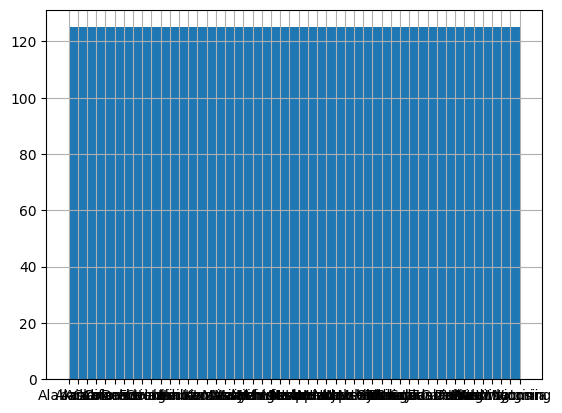

Plotting for column Year


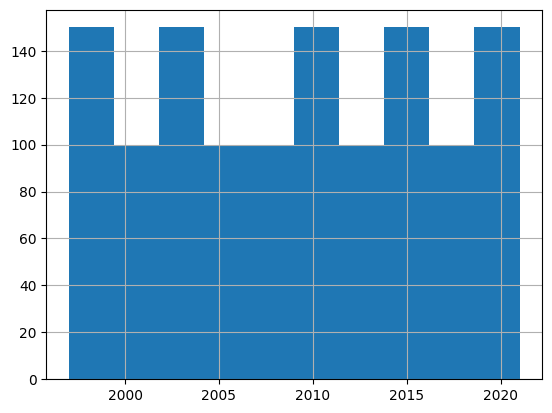

Plotting for column Motor_vehicles_and_parts


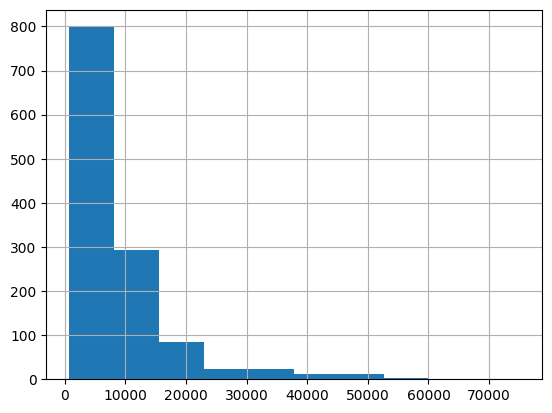

Plotting for column Furnishings_and_durable_household_equipment


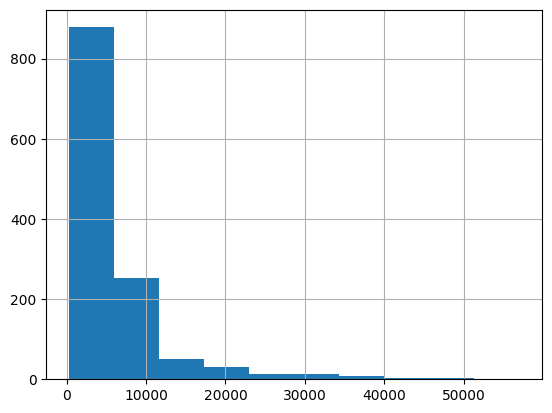

Plotting for column Recreational_goods_and_vehicles


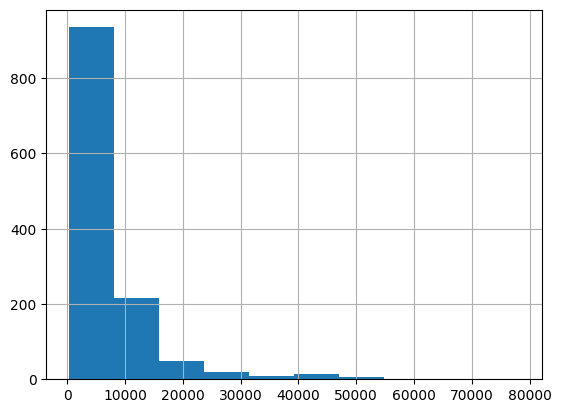

Plotting for column Other_durable_goods


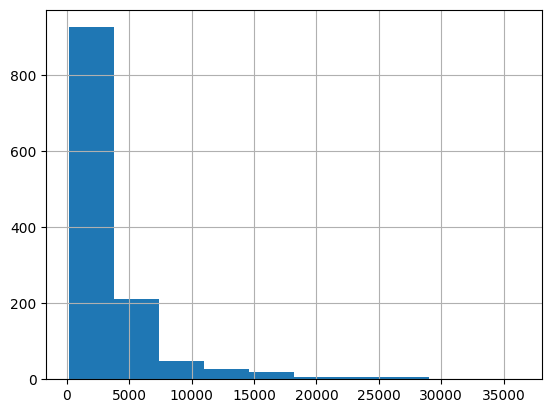

Plotting for column Food_and_beverages_purchased_for_off-premises_consumption


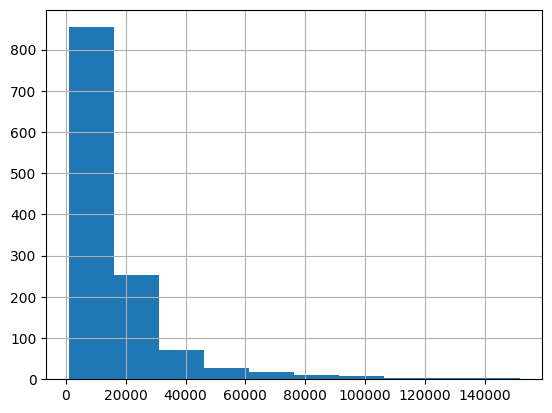

Plotting for column Clothing_and_footwear


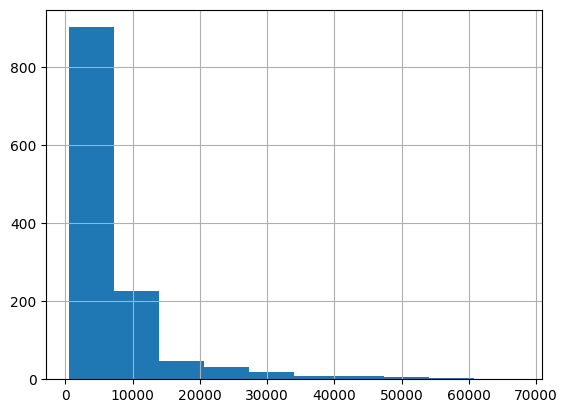

Plotting for column Gasoline_and_other_energy_goods


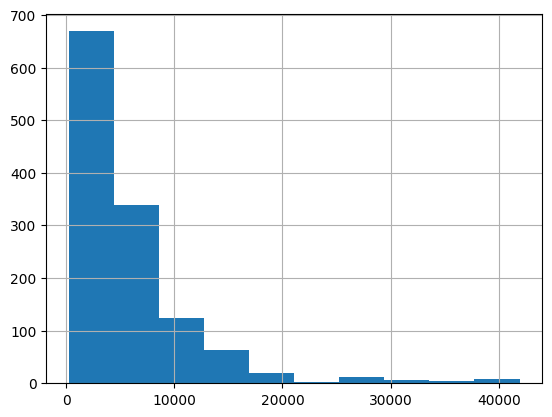

Plotting for column Other_nondurable_goods


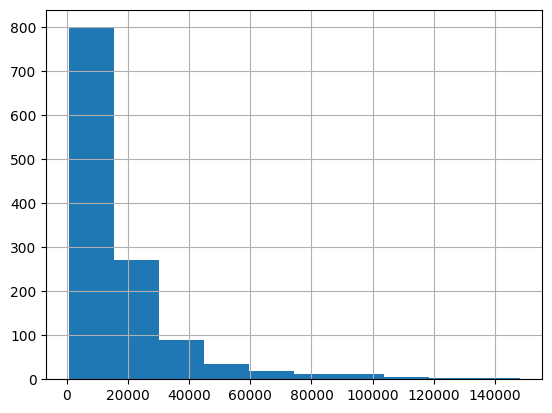

Plotting for column Housing_and_utilities


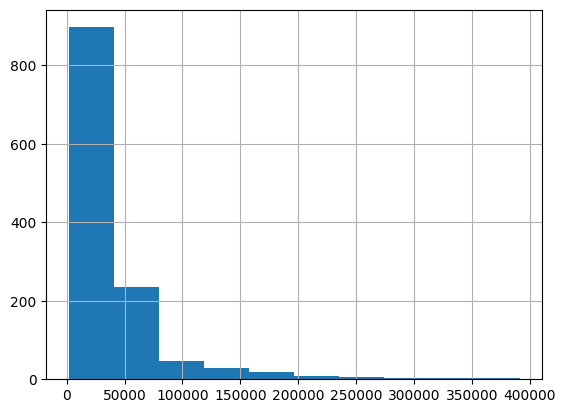

Plotting for column Health_care


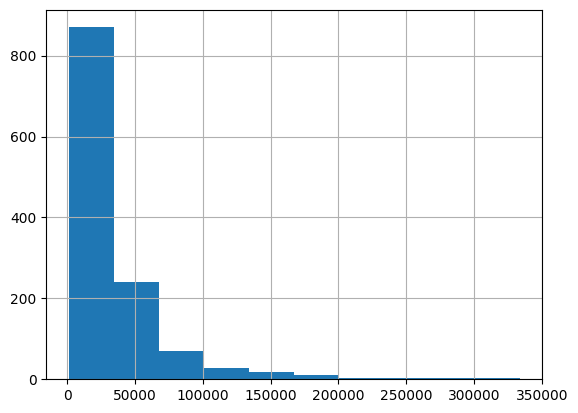

Plotting for column Transportation_services


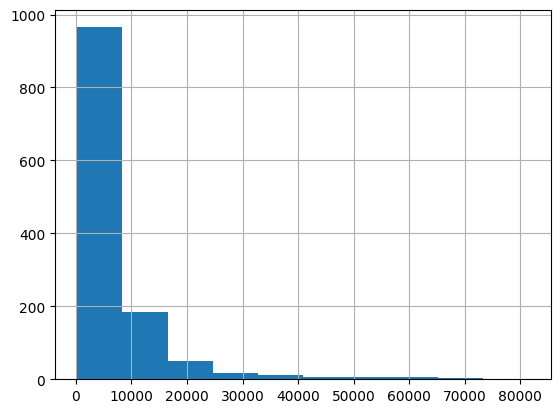

Plotting for column Recreation_services


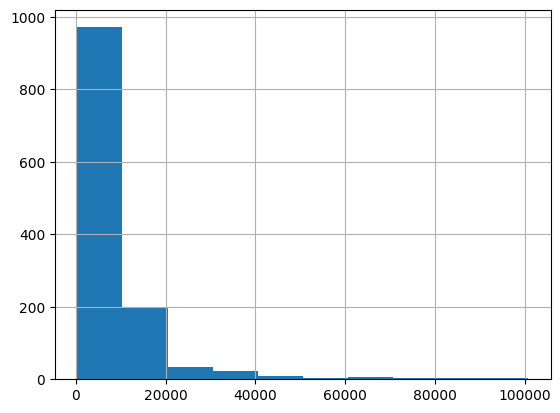

Plotting for column Food_services_and_accommodations


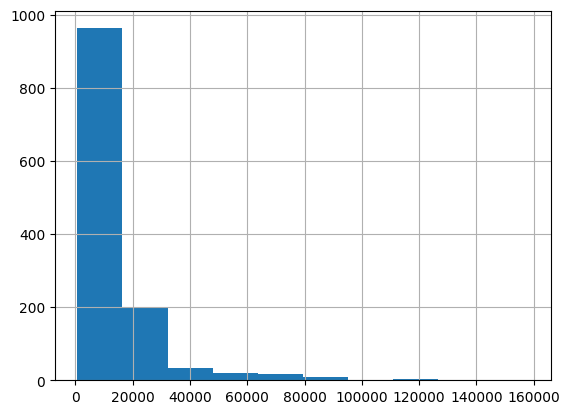

Plotting for column Financial_services_and_insurance


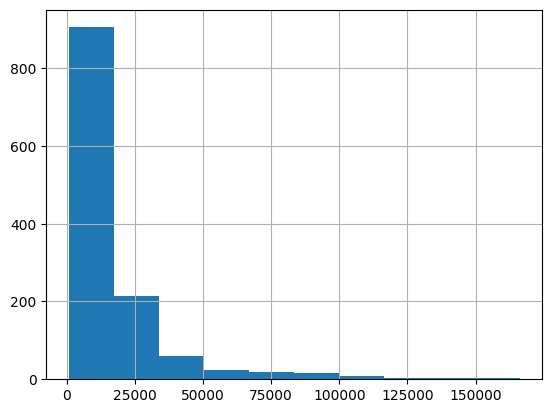

Plotting for column Other_services


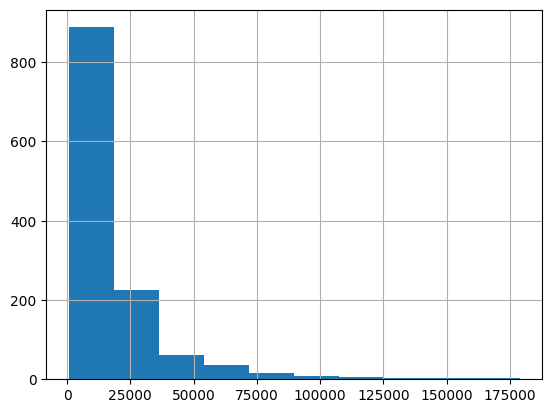

Plotting for column GDP


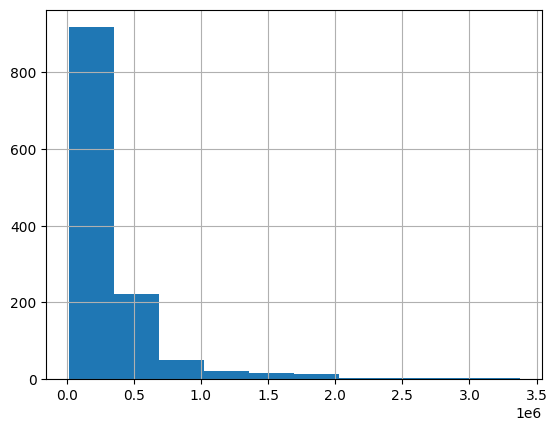

Plotting for column Disposable_personal_income


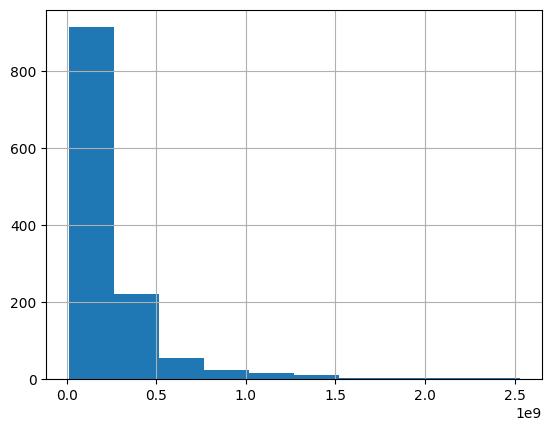

Plotting for column Population


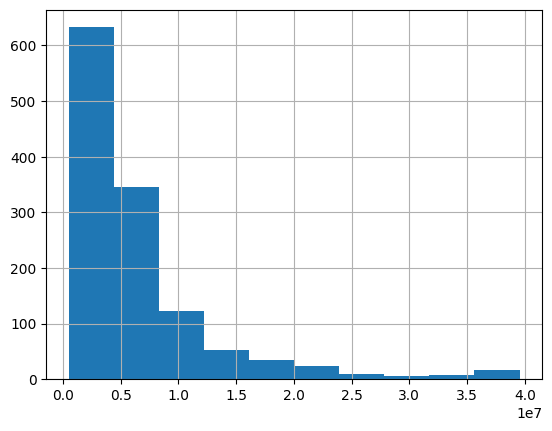

Plotting for column CO2


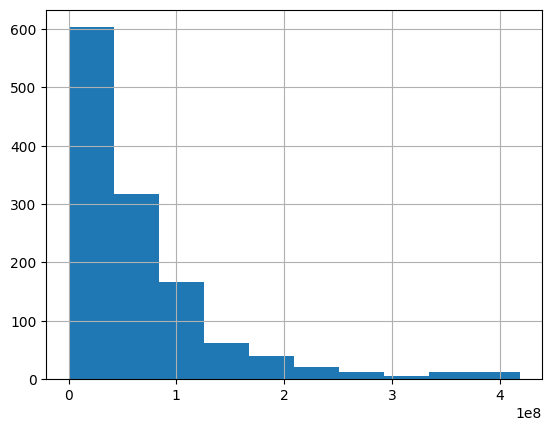

In [7]:
#  VISUALIZE ORIGINAL DATA WITH A HISTOGRAM

for col in df_original.columns:
    hist = df_original[col].hist(bins=10)
    print("Plotting for column {}".format(col))
    plt.show()

In [8]:
# DATA 2

# DATA 2

df_original['consumer_goods'] = df_original['Motor_vehicles_and_parts'] + df_original['Furnishings_and_durable_household_equipment'] 
+ df_original['Other_durable_goods'] + df_original['Clothing_and_footwear'] + df_original['Other_nondurable_goods']
df_original['consumer_goods'] = np.log(df_original['consumer_goods'])


df_original['leisure'] = df_original['Recreational_goods_and_vehicles'] + df_original['Recreation_services'] 
+ df_original['Food_services_and_accommodations']
df_original['leisure'] = np.log(df_original['leisure'])

df_original['nutrition'] = df_original['Food_and_beverages_purchased_for_off-premises_consumption']
df_original['nutrition'] = np.log(df_original['nutrition'])

df_original['mobility'] = df_original['Gasoline_and_other_energy_goods'] + df_original['Transportation_services']
df_original['mobility'] = np.log(df_original['mobility'])

df_original['housing'] = df_original['Housing_and_utilities']
df_original['housing'] = np.log(df_original['housing'])

df_original['services'] = df_original['Health_care'] + df_original['Financial_services_and_insurance'] + df_original['Other_services']/df_original['Population']
df_original['services'] = np.log(df_original['services'])

df_original['CO2'] = np.log(df_original['CO2'])
# drop original variables

df = df_original[['State', 'Year', 'CO2', 'consumer_goods', 'leisure', 'nutrition', 'mobility', 'housing', 'services']]

In [9]:
df

,State,Year,CO2,consumer_goods,leisure,nutrition,mobility,housing,services
0,Alabama,1997,18.294224,8.861464,8.452228,8.955100,8.467604,9.485469,9.770390
1,Alabama,1998,18.258408,8.930970,8.489945,8.970356,8.433333,9.534350,9.812205
2,Alabama,1999,18.291129,9.012085,8.545003,9.007783,8.512321,9.582972,9.845509
3,Alabama,2000,18.382135,9.031022,8.584534,9.028315,8.662072,9.646891,9.910428
4,Alabama,2001,18.458786,9.062988,8.590128,9.081836,8.619912,9.716453,9.950839
...,...,...,...,...,...,...,...,...,...
1245,Wyoming,2017,17.902801,7.470281,7.132977,7.565638,7.273509,8.355309,8.816794
1246,Wyoming,2018,17.887139,7.502186,7.182200,7.588880,7.367961,8.389519,8.845000
1247,Wyoming,2019,17.802499,7.515399,7.209710,7.621783,7.376383,8.415869,8.844957
1248,Wyoming,2020,17.767458,7.609515,7.120202,7.705983,7.140453,8.422091,8.826471


In [10]:
df.rename(columns = {'Year':'ds', 'CO2':'y'}, inplace = True)

/tmp/ipykernel_43582/2693559045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Year':'ds', 'CO2':'y'}, inplace = True)


In [11]:
per_state = [x for _, x in df.groupby('State')]

In [12]:
def df_split(i):
    s0_split = i.copy()
    
    s0_fit = s0_split[:-5]
    s0_predict = s0_split[-5:]
    s0_predict['y'] = np.nan
        
    s0_fit['cap'] = 50
    s0_predict['cap'] = 50
    
    s0_fit['floor'] = 1
    s0_predict['floor'] = 1
    
    return s0_fit, s0_predict

In [13]:
def model_prophet(s0_fit, s0_predict):
      
    
    model = Prophet(growth='logistic')
    
    
    #model = Prophet(interval_width=0.95)
    #model.add_seasonality(name='monthly', period=30.5, fourier_order=2)
    model.add_regressor('consumer_goods', standardize=True)
    model.add_regressor('leisure', standardize=True)
    model.add_regressor('nutrition', standardize=True)
    model.add_regressor('mobility', standardize=True)
    model.add_regressor('housing', standardize=True)
    model.add_regressor('services', standardize=True)
    
    model.fit(s0_fit)
    
    forecast = model.predict(s0_predict)
    output = forecast['yhat'].tolist()
    
    
    return output

In [14]:
####### AANCHAL, this is additional code for cross-validation


def cv_prophet(s0_fit, s0_predict):
    model = Prophet(growth='logistic')
    
    model.add_regressor('consumer_goods', standardize=True)
    model.add_regressor('leisure', standardize=True)
    model.add_regressor('nutrition', standardize=True)
    model.add_regressor('mobility', standardize=True)
    model.add_regressor('housing', standardize=True)
    model.add_regressor('services', standardize=True)
    
    model.fit(s0_fit)
    
    forecast = model.predict(s0_predict)    
    
    cv_results = cross_validation(
        model = model,
        initial = '732 days',
        period = '365 days',
        horizon = '366 days')
   
    df_p = performance_metrics(cv_results)
    
    
    return df_p
    

In [15]:
####### AANCHAL, this is additional code for cross-validation

# Selecting a random state to show the model performance
# Running the cross validation for all the states is lenghty and time consuming

random.seed(1)
ix = random.randint(0, 49)
s0_fit, s0_predict = df_split(per_state[ix])
c = cv_prophet(s0_fit, s0_predict)


/tmp/ipykernel_43582/4278667715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s0_predict['y'] = np.nan
/tmp/ipykernel_43582/4278667715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s0_fit['cap'] = 50
/tmp/ipykernel_43582/4278667715.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

  0%|          | 0/17 [00:00<?, ?it/s]

22:03:13 - cmdstanpy - INFO - Chain [1] start processing
22:03:13 - cmdstanpy - INFO - Chain [1] done processing
22:03:13 - cmdstanpy - INFO - Chain [1] start processing
22:03:13 - cmdstanpy - INFO - Chain [1] done processing
22:03:14 - cmdstanpy - INFO - Chain [1] start processing
22:03:14 - cmdstanpy - INFO - Chain [1] done processing
22:03:14 - cmdstanpy - INFO - Chain [1] start processing
22:03:14 - cmdstanpy - INFO - Chain [1] done processing
22:03:15 - cmdstanpy - INFO - Chain [1] start processing
22:03:15 - cmdstanpy - INFO - Chain [1] done processing
22:03:15 - cmdstanpy - INFO - Chain [1] start processing
22:03:16 - cmdstanpy - INFO - Chain [1] done processing
22:03:17 - cmdstanpy - INFO - Chain [1] start processing
22:03:17 - cmdstanpy - INFO - Chain [1] done processing
22:03:17 - cmdstanpy - INFO - Chain [1] start processing
22:03:18 - cmdstanpy - INFO - Chain [1] done processing
22:03:19 - cmdstanpy - INFO - Chain [1] start processing
22:03:27 - cmdstanpy - INFO - Chain [1]

In [16]:
print("Cross-validation performance metrics for US state: ", per_state[ix]['State'].iloc[0])
print(c.iloc[4])

Cross-validation performance metrics for US state:  Florida
horizon     365 days 00:00:00
mse                  0.028471
rmse                 0.168733
mae                  0.106621
mape                 0.005666
mdape                0.002488
smape                0.005626
coverage                  0.0
Name: 4, dtype: object


MDAPE value interpretation: https://stephenallwright.com/mdape/

Advantages of using MDAPE
- Error is returned as a percentage, making it easy to understand
- Possible to compare against other models as it’s returned as a percentage
- Not as sensitive to outliers as MAPE due it being the median

Disadvantages of using MDAPE
- If your actual values can be zero or close to zero, then MDAPE won't be possible to calculate